In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('../../datasets/Time_analysis_preprocess_dataset_ont_hot.csv')
df.head(3)

,time,quantity_sold_kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_amaranth,item_name_apricot bao mushroom,item_name_basil,item_name_bell pepper,...,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
0,9,1.132,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,9,0.593,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,9,0.468,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [35]:
df.shape

,date,item_name,category_name,quantity_sold_kg,unit_selling_price_rmb/kg
0,2021-01-01,7 colour pepper,capsicum,0.383875,18.0
1,2021-01-01,apricot bao mushroom,mushroom,0.278333,10.0
2,2021-01-01,bell pepper,capsicum,0.260000,16.0


In [19]:
# Find the clusters using elbow method
from sklearn.cluster import KMeans
k_values = range(1,25)
wcss_error = []
for k in k_values :
    model = KMeans(n_clusters= k)
    model.fit(df)
    wcss_error.append(model.inertia_)

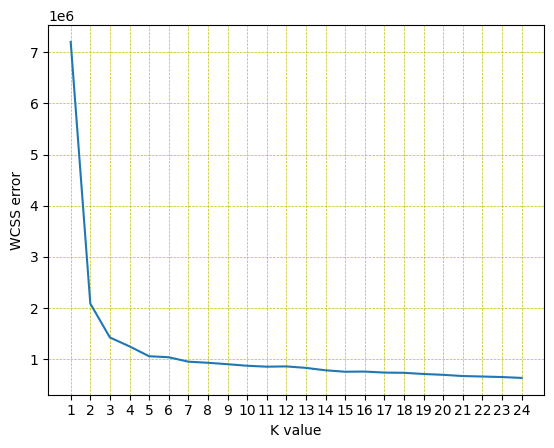

In [20]:
plt.plot(k_values, wcss_error)
plt.xlabel('K value')
plt.ylabel('WCSS error') 
plt.xticks(k_values)
plt.grid(True, linewidth = 0.5, color = 'y', linestyle = '--')

In [21]:
from sklearn.cluster import KMeans

In [22]:
# Apply K-Means algorithm
kmeans = KMeans(n_clusters=4, random_state=42)
pred = kmeans.fit_predict(df)
pred

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [23]:
df['cluster'] = pred
df.head(3)

,time,quantity_sold_kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_amaranth,item_name_apricot bao mushroom,item_name_basil,item_name_bell pepper,...,item_name_zhimaxiancai,item_name_zhuyecai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum,cluster
0,9,1.132,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
1,9,0.593,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
2,9,0.468,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0


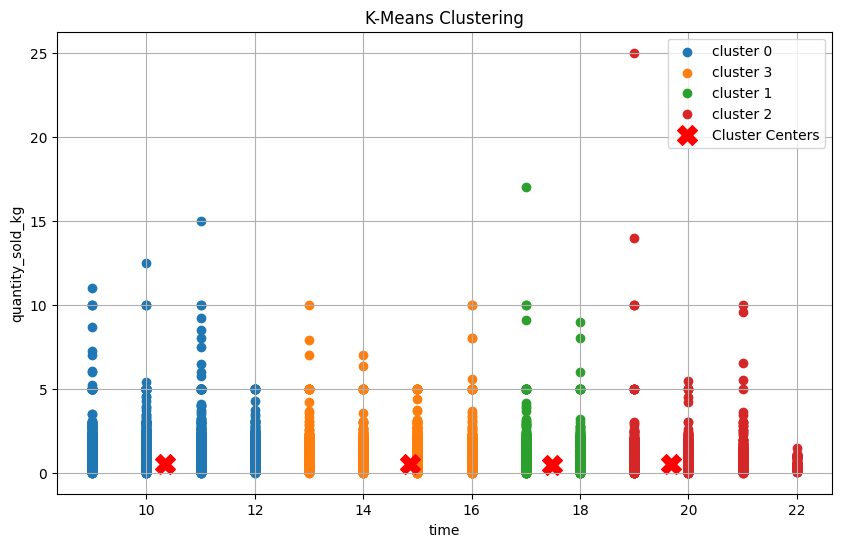

In [24]:
# Scatter plot for visualization
plt.figure(figsize=(10, 6))

# Plot each cluster
for cluster_label in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['time'], cluster_data['quantity_sold_kg'], label=f'cluster {cluster_label}')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Cluster Centers')

# Add labels and legend
plt.xlabel('time')
plt.ylabel('quantity_sold_kg')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [25]:
# save the model
import pickle
with open('TimeBasedAnalysis.pickle', 'wb') as file:
    pickle.dump(kmeans, file)

In [26]:
df['cluster'].value_counts()

cluster
0    188794
3    120623
1     97213
2     68544
Name: count, dtype: int64

In [27]:
df_2 = pd.read_csv('../../datasets/Time_analysis_preprocess_dataset.csv')
df_2['cluster'] = df['cluster']
df_2.head(3)

,item_name,category_name,time,quantity_sold_kg,cluster
0,green hot peppers,capsicum,9,1.132,0
1,green hot peppers,capsicum,9,0.593,0
2,yunnan lettuces,flower,9,0.468,0


In [28]:
df_2 = df_2.drop(columns=['quantity_sold_kg', 'time'])

In [30]:
df_2.duplicated().value_counts()

True     474519
False       655
Name: count, dtype: int64

In [31]:
df_2 = df_2.drop_duplicates()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655 entries, 0 to 475149
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   item_name      655 non-null    object
 1   category_name  655 non-null    object
 2   cluster        655 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 17.9+ KB


In [32]:
df_2.to_csv('time_model.csv', index=False)